# Waterfilling Levels

In [1]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions\\food_bank_functions.py'>

### Test

In [2]:
n = 6
sorted_distribution = np.asarray([np.arange(2) + 1 for x in range(n)])
weights = np.asarray([np.zeros(2)+0.5 for x in range(n)])
median = np.zeros(n)+1.5
variance = np.zeros(n) + .25
delta = np.zeros(n) + .1

expected_demand = 1.5
max_budget = n * expected_demand

In [3]:
print(median)

[1.5 1.5 1.5 1.5 1.5 1.5]


In [4]:
print(max_budget)

9.0


In [5]:
group_demands = [2, 1, 1, 1, 2, 1]

In [6]:
print(waterfilling_waste(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [7]:
print(greedy(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [8]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[1.5 1.  1.  1.  1.5 1. ]


In [9]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [10]:
print(waterfilling_dynamic_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [11]:
print(waterfilling_dynamic_full_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [12]:
print(waterfilling_weights_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [13]:
print(waterfilling_weights_full_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [14]:
print(max_min_heuristic(group_demands, median, [1.5, 1.5, 1.5, 1.5, 1.5, 1.5], variance, max_budget))

[1.71428571 0.85714286 0.85714286 0.85714286 1.71428571 1.        ]


# Experiments

## Varying Number of Groups

In [15]:
num_iterations = 100
max_n = 100
sorted_distribution = [1, 2]
weights = [1,2]
expected_demand = np.dot([1,2],[1/2, 1/2])
max_budget = max_n*expected_demand

In [16]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 1000
for i in np.arange(2, max_n+1):
    for _ in range(num_iterations):
        budget = i * 1.5
        demands = np.random.choice(size=i, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[0.         0.         1.6095     1.71675    1.81916667 1.84845833
 1.8802     1.88324167 1.89230476 1.89538571 1.90973413 1.90843512
 1.91483658 1.91012096 1.92096566 1.91177639 1.92361543 1.92001362
 1.92919347 1.92704082 1.93270335 1.93214363 1.93378946 1.93558969
 1.93295906 1.93255581 1.93957972 1.93586458 1.94062297 1.9345863
 1.93883626 1.93909444 1.94469851 1.93764934 1.9430081  1.94297457
 1.94484841 1.94571388 1.94350111 1.94466934 1.95238078 1.94665941
 1.94485731 1.94669244 1.9533561  1.95112964 1.95158087 1.95311336
 1.9523375  1.95508645 1.95071887 1.95292244 1.94917637 1.95185187
 1.95128383 1.9537107  1.95490789 1.9532918  1.95652468 1.95415634
 1.95245529 1.95765466 1.95862182 1.95783508 1.95662511 1.95696672
 1.95528271 1.95663345 1.95630289 1.95585235 1.95908672 1.95879112
 1.96243871 1.95987242 1.95789912 1.95667566 1.96167352 1.96307473
 1.95993687 1.95752318 1.96009403 1.96282847 1.95812262 1.96084536
 1.96108932 1.9618721  1.96361029 1.95995769 1.96000297 1.96458

In [17]:
print(weights)

[1, 2]


### Look at scaling with n

In [18]:
data_dict = {'NumGroups':[], 'Norm':[], 'Dynamic':[],'Weights':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'Dynamic_Full':[], 'Weights_Full':[], 'Max_Min_Heuristic':[]}
num_iterations = 100
for n in np.arange(2,max_n+1,1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + 1.5
    group_median_demands = np.zeros(n) + 1
    group_variance = np.zeros(n) + 0.25
    
    budget = n*1.5
    print(n)
    for i in range(num_iterations):
        data_dict['NumGroups'].append(n)

        
        group_demands = np.random.choice(size=n, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(group_demands,budget)
        
        weights_sol = waterfilling_weights_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        weights_full_sol = waterfilling_weights_full_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        dynamic = waterfilling_dynamic_waste(group_expected_demands,group_demands,budget)
        dynamic_full = waterfilling_dynamic_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
        
        data_dict['Norm'].append('L1')
        data_dict['Weights'].append(np.sum(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.sum(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.sum(np.absolute(opt-weights_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min_Heuristic'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))
        
        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Weights'].append(np.max(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.max(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.max(np.absolute(opt-weights_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min_Heuristic'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
4
5
Gave out more than budget
Gave out more than budget
6
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
7
Gave out more than budget
Gave out more than budget
8
9
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
10
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
11
Gave out more than budget
12
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
13
Gave out more than budget
Gave out more than budget
14
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
15
Gave out more than budget
Gave out more than budget
Gave

Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
63
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
64
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
65
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
66
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
67
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budg

In [19]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [20]:
df.to_csv('scale_with_n.csv')

In [21]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [22]:
df.head

<bound method NDFrame.head of         NumGroups  Norm           variable     value
0               2    L1            Dynamic  0.000000
1               2  Linf            Dynamic  0.000000
2               2    L1            Dynamic  0.500000
3               2  Linf            Dynamic  0.500000
4               2    L1            Dynamic  0.000000
...           ...   ...                ...       ...
178195        100  Linf  Max_Min_Heuristic  0.013793
178196        100    L1  Max_Min_Heuristic  4.333159
178197        100  Linf  Max_Min_Heuristic  0.252664
178198        100    L1  Max_Min_Heuristic  1.887812
178199        100  Linf  Max_Min_Heuristic  0.043830

[178200 rows x 4 columns]>

<AxesSubplot:title={'center':'Simple Distribution L1'}, xlabel='NumGroups', ylabel='value'>

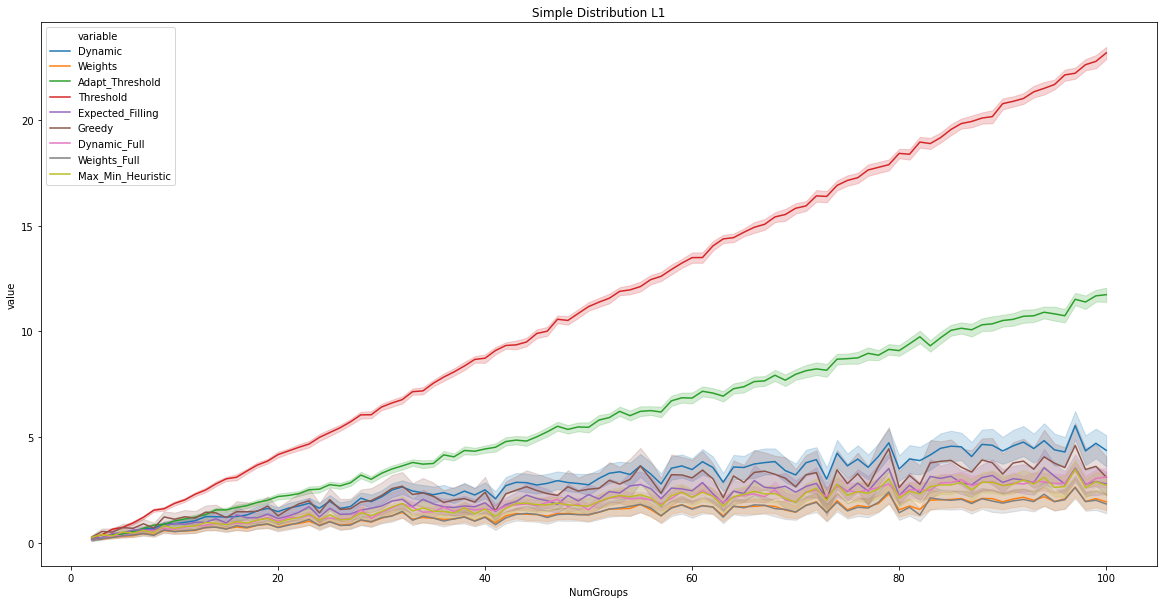

In [23]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

<AxesSubplot:title={'center':'Simple Distribution LInf'}, xlabel='NumGroups', ylabel='value'>

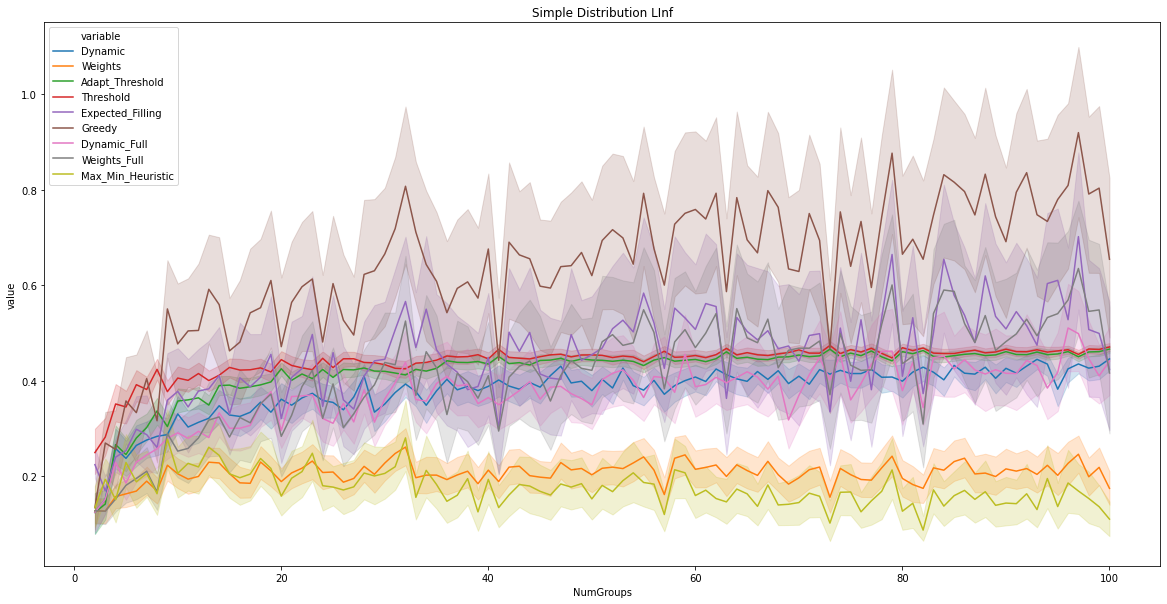

In [24]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution LInf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [25]:
data_dict = {'Group':[], 'Weights_Full':[], 'Weights_Online':[],'Dynamic_Full':[], 'Dynamic_Online':[], 'True':[], 'Max_Min_Heuristic':[]}
num_iterations = 100


for i in range(num_iterations):
    max_n = 100
    
    weights = [1/2, 1/2]
    sorted_support = [1., 2.]
    expected_demands = [1.5 for x in range(max_n)]
    median_demands = [1. for _ in range(max_n)]
    variance = [.25 for _ in range(max_n)]
    
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*1.5
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    dynamic_full = np.copy(expected_demands)
    dynamic_online = np.sort(np.copy(expected_demands))
    
    dynamic_online_budget = max_budget
    weights_online_budget = max_budget

    weights_online_support = np.copy(sorted_support)
    weights_online_vals = np.copy(weights)*max_n
    
    weights_full_support = np.copy(sorted_support)
    weights_full_vals = np.copy(weights)*max_n

    max_min_budget = max_budget
    min_fill = 1.

    for n in range(max_n):
        # Solve for the various waterfilling levels
        data_dict['Group'].append(n)
        
        # Adds on the true waterfilling level
        data_dict['True'].append(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
        
        
        # Dynamic_Full
        
        # Replaces current town's demand with realized demand
        dynamic_full[n] = group_demands[n]
        # Sorts demands
        dynamic_full_sorted = np.sort(np.copy(dynamic_full))
        # Appends maximum allocation based on full demand with full budget
        data_dict['Dynamic_Full'].append(max(waterfilling_sorted(dynamic_full_sorted, max_budget)))
            
            
        # Dynamic_Online
        
        # Removes expected demand for current agent from list
        dynamic_online = delete_sorted(dynamic_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(dynamic_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, dynamic_online_budget)
        data_dict['Dynamic_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        dynamic_online_budget -= min(tmp_sol[index], dynamic_online_budget, group_demands[n])
        
        
        # Weights_Full
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_full_support - obs_demand))
        weights_full_vals -= weights
        weights_full_vals[index] += 1
        
        data_dict['Weights_Full'].append(max(waterfilling_sorted_weights(weights_full_support, weights_full_vals, max_budget)))
        
        
        # Weights_Online
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_online_support - obs_demand))
        weights_online_vals -= weights
        weights_online_vals[index] += 1        
        
        
        tmp_sol = waterfilling_sorted_weights(weights_online_support, weights_online_vals, weights_online_budget)
        weights_online_budget -= min(obs_demand, weights_online_budget, tmp_sol[index])
        
        weights_online_vals[index] -= 1
        data_dict['Weights_Online'].append(max(tmp_sol))
        
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min_Heuristic'].append(min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min_Heuristic'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation

Demands for experiment:[1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1.
 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1.
 1. 1. 2. 2.]
Demands for experiment:[1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1.
 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2.
 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2.
 1. 1. 1. 1.]
Demands for experiment:[2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1.
 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2.]
Demands for e

 2. 1. 2. 2.]
Demands for experiment:[2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2.
 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2.
 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1.
 1. 1. 2. 2.]
Demands for experiment:[1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1.
 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2.
 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 1.]
Demands for experiment:[1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1.
 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2.
 2. 2. 1. 2.]

 2. 2. 1. 2.]
Demands for experiment:[2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2.
 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1.
 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1.
 2. 1. 2. 2.]
Demands for experiment:[1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2.
 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2.
 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 2. 2.]
Demands for experiment:[1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2.
 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2.
 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2.]

Demands for experiment:[1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1.
 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 2.]
Demands for experiment:[2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1.
 2. 1. 1. 1.]
Demands for experiment:[2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2.
 1. 1. 2. 2.]
Demands for e

In [26]:
np.std(data_dict['True'])

0.05443156258280927

In [27]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [28]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [29]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5, 0, 'Estimated Level')

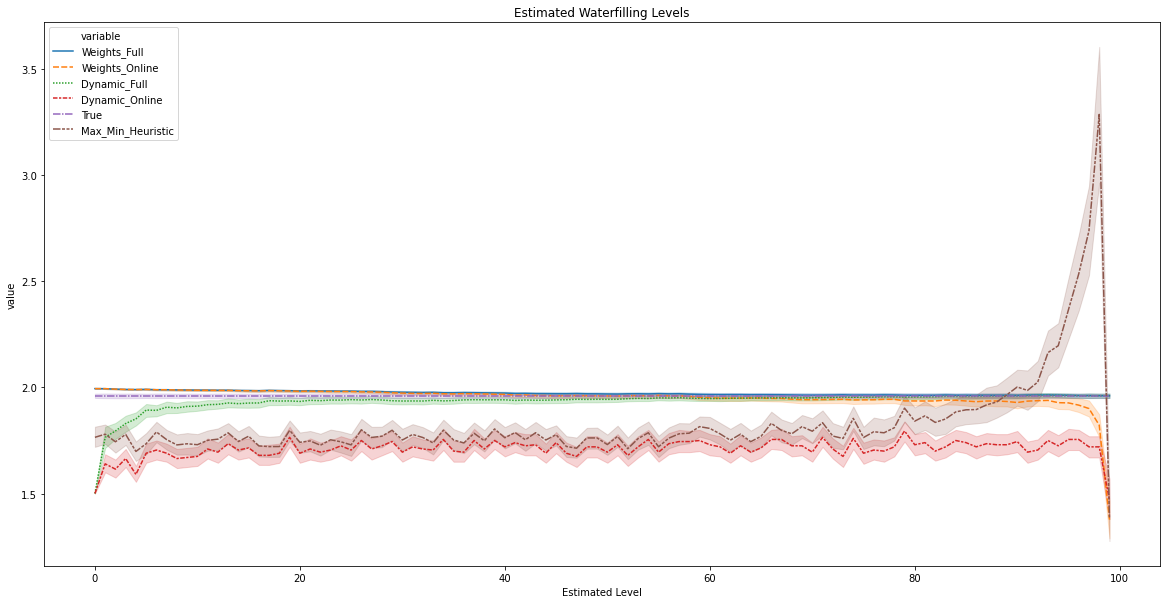

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [31]:
num_iterations = 1000
weights = [1/2, 1/2]
sorted_distribution = [1., 2.]
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [32]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + expected_demand
budget = expected_demand*n
score_weights_online = np.zeros((n,num_iterations))
score_weights_full = np.zeros((n,num_iterations))
score_dynamic_online = np.zeros((n,num_iterations))
score_dynamic_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n,num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((9,num_iterations))
po = np.zeros((9,num_iterations))
prop = np.zeros((9,num_iterations))
linf = np.zeros((9,num_iterations))
max_min = np.zeros((9, num_iterations))

for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    
    group_median_demands = np.zeros(n) + 1.
    group_variance = np.zeros(n) + 0.25
    delta = np.zeros(n) + .1
    
    opt = waterfilling_waste(group_demands,budget)

    weights_sol = waterfilling_weights_waste_iid(weights, sorted_distribution, group_demands, budget)
    weights_full_sol = waterfilling_weights_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_dynamic_waste(group_expected_demands,group_demands,budget)
    dynamic_full = waterfilling_dynamic_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing weights_online
    
    score_weights_online[:,i] = opt - weights_sol
    env[0,i] = max(0,np.amax(envy_utility(weights_sol,group_demands)))
    po[0,i] = excess(weights_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(weights_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(weights_sol, group_demands, budget))
    linf[0,i] = np.amax(score_weights_online[:,i])
    
    
    # comparing weights_full
    
    score_weights_full[:,i] = opt - weights_full_sol
    env[1,i] = max(0,np.amax(envy_utility(weights_full_sol,group_demands)))
    po[1,i] = excess(weights_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(weights_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(weights_full_sol, group_demands, budget))
    linf[1,i] = np.amax(score_weights_full[:,i])
    
    
    # comparing dynamic_online
    
    score_dynamic_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(score_dynamic_online[:,i])
    
    
    # comparing dynamic_full
    
    score_dynamic_full[:,i] = opt - dynamic_full
    env[3,i] = max(0,np.amax(envy_utility(dynamic_full,group_demands)))
    po[3,i] = excess(dynamic_full,budget)
    prop[3,i] = np.amax(proportionality_utility(dynamic_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(dynamic_full, group_demands, budget))
    linf[3,i] = np.amax(score_dynamic_full[:,i])
    
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(score_greedy[:,i])
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(score_fixed_threshold[:,i])    
    
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(score_adapt_threshold[:,i])    

    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(score_expect_threshold[:,i])    
  

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(score_max_min[:,i]) 

Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out mor

In [33]:
score_weights_online = np.average(score_weights_online, axis=1)
score_weights_full = np.average(score_weights_full, axis=1)
score_dynamic_online = np.average(score_dynamic_online, axis=1)
score_dynamic_full = np.average(score_dynamic_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
max_min = np.average(max_min, axis=1)

In [34]:
print('weights_online, weights_full, dynamic_online, dynamic_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print('po')
print(po)
print('prop')
print(prop)
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print('linf')
print(linf)

weights_online, weights_full, dynamic_online, dynamic_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.11900049 0.31965185 0.23275    0.2356439  0.4475     0.
 0.24763314 0.30125342 0.08089663]
po
[0.02586314 0.02351575 0.03833    0.04063565 0.02092    0.25064
 0.12807554 0.03029837 0.03272243]
prop
[0.01442182 0.26141122 0.         0.06533592 0.41125    0.
 0.         0.27108947 0.06350969]
sum
[0.15928545 0.60457882 0.27108    0.34161548 0.87967    0.25064
 0.37570869 0.60264127 0.17712875]
max_min
[0.88089556 0.68012208 0.76725    0.76140877 0.5525     0.75
 0.75236686 0.68505287 0.91910337]
linf
[0.20309908 0.50167177 0.4303902  0.41627845 0.76103551 0.4648902
 0.46015649 0.50581105 0.12979252]


In [35]:
data_dict = {'Group':group, 'Weights_Online': score_weights_online, 'Weights_Full':score_weights_full, 'Dynamic_Online':score_dynamic_online, 'Dynamic_Full':score_dynamic_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min_Heuristic':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Group")

In [36]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5, 0, 'Estimated Level')

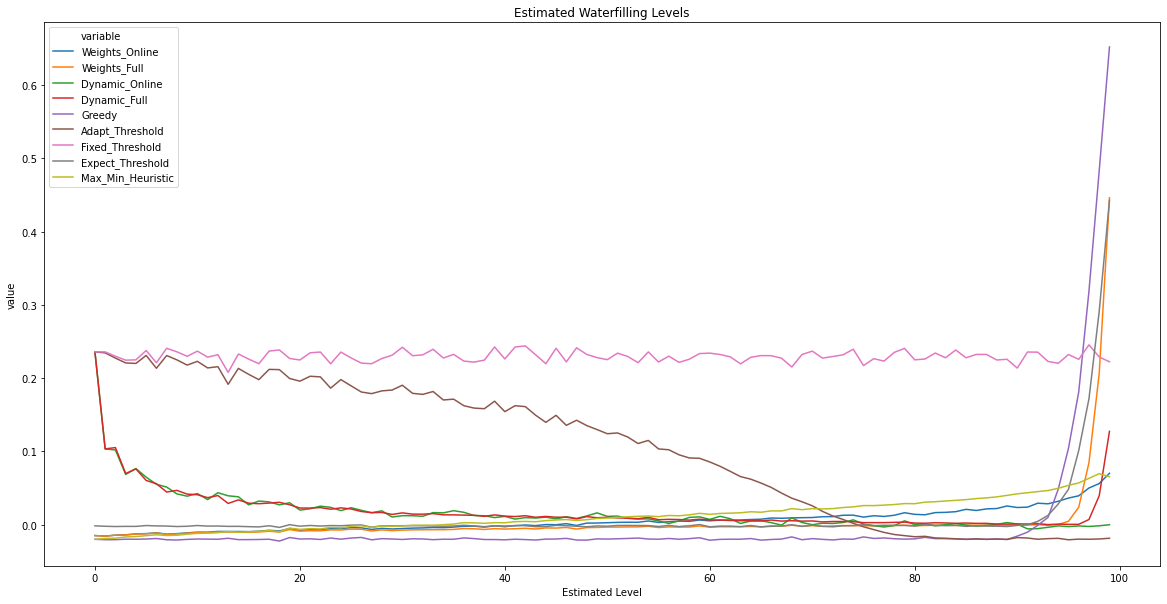

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', hue = 'variable', data=df_uniform)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')